Get Mean Sqaured (Prediction) Error for lambda-inference for different sample sizes of demonstrated trajectories

In [1]:
import numpy as np
import pandas as pd
import re

from sklearn.metrics import mean_squared_error as MSE

import matplotlib.pyplot as plt

In [2]:
# |Set root for GPUDrive import
import os
import sys
from pathlib import Path

# Set working directory to the base directory 'gpudrive'
working_dir = Path.cwd()
while working_dir.name != 'gpudrive-CoDec':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive' not found")
os.chdir(working_dir)
sys.path.append(str(working_dir))

In [4]:
def sqrd_error(true_vals, pred_vals):
    errs = (np.array(true_vals)-np.array(pred_vals))**2
    mean_errs = np.mean(errs)
    # var_errs = np.std(errs, ddof=1)
    var_errs = np.std(errs, ddof=1) / np.sqrt(np.size(errs))
    return mean_errs, var_errs

In [ ]:
data_path = 'examples/CoDec_Research/results/analysis_results/Results_Set1V2_NeurIPS2025/Revision/ServerResults/sampleVariation/Test2/Set1V2_results_1samples.tsv'

temp = pd.read_csv(data_path, sep='\t')

: 

In [5]:
from numpy import mean


data_path = 'examples/CoDec_Research/results/analysis_results/Results_Set1V2_NeurIPS2025/Revision/ServerResults/sampleVariation/Test3/Set1V2_results_1samples.tsv'
MSE_results = {}
NLL_results = {}
for sample_count in list(range(1,10,1))+list(range(10,51,5)):
    # print(f"Results for {sample_count} samples")
    data_path = re.sub(r'[0-9]+samples', f'{sample_count}samples', data_path)
    try:
        temp = pd.read_csv(data_path, sep='\t')
    except:
        print(f"File {data_path} does not exist.")
    MSE_results[sample_count*10] = sqrd_error(temp["lambda_true"], temp["lambda_predicted"])
    NLL_results[sample_count*10] = -1*mean(temp["log_likelihood"])
    # for grp_indx, grp_data in temp.groupby("parameter"):
    #     print(grp_indx, " : ", MSE(grp_data["lambda_true"], grp_data["lambda_predicted"]))

In [8]:
MSE_results

{10: (np.float64(52.64161498639978), np.float64(10.91836161489005)),
 20: (np.float64(29.669425457933368), np.float64(3.8076111083475057)),
 30: (np.float64(29.575086059697664), np.float64(6.775302650702603)),
 40: (np.float64(28.340793774569825), np.float64(3.9490202441353195)),
 50: (np.float64(23.437756476843585), np.float64(4.19712283224737)),
 60: (np.float64(25.79901347205763), np.float64(3.520157794630303)),
 70: (np.float64(21.717396745545905), np.float64(3.5128072660618193)),
 80: (np.float64(19.559936980972218), np.float64(3.101463148206701)),
 90: (np.float64(28.18425433258191), np.float64(4.106301732991888)),
 100: (np.float64(23.058462298135865), np.float64(3.2591024037160397)),
 150: (np.float64(18.488277160437608), np.float64(2.924042731247521)),
 200: (np.float64(21.77753436413946), np.float64(3.235007295379994)),
 250: (np.float64(27.680413291925454), np.float64(3.854360557193963)),
 300: (np.float64(21.582191263870925), np.float64(3.3008179827244626)),
 350: (np.float

____________________________
|  SS  |  Mean   |   SD    |
----------------------------
|  10  |  52.64  |  10.92  |
|  20  |  29.67  |  3.81   |
|  30  |  29.58  |  6.78   |
|  40  |  28.34  |  3.95   |
|  50  |  23.44  |  4.20   |
|  60  |  25.80  |  3.52   |
|  70  |  21.72  |  3.51   |
|  80  |  19.56  |  3.10   |
|  90  |  28.18  |  4.11   |
|  100 |  23.06  |  3.26   |
|  150 |  18.49  |  2.92   |
|  200 |  21.78  |  3.24   |
|  250 |  27.68  |  3.85   |
|  300 |  21.58  |  3.30   |
|  350 |  26.44  |  3.78   |
|  400 |  22.43  |  3.22   |
|  450 |  22.78  |  3.44   |
|  500 |  23.37  |  3.51   |
|__________________________|

In [21]:
NLL_results

{10: np.float64(688.096179585348),
 20: np.float64(1407.9439120171123),
 30: np.float64(2084.930915461404),
 40: np.float64(2772.0382637490393),
 50: np.float64(3507.3859961543994),
 60: np.float64(4156.277159575862),
 70: np.float64(4888.049984715593),
 80: np.float64(5581.474777708626),
 90: np.float64(6231.777977967332),
 100: np.float64(6978.740557438252),
 150: np.float64(10423.759464098188),
 200: np.float64(13920.948245363292),
 250: np.float64(17319.536266508374),
 300: np.float64(20823.92136308635),
 350: np.float64(24315.80271362521),
 400: np.float64(27753.600964781635),
 450: np.float64(27753.600964781635)}

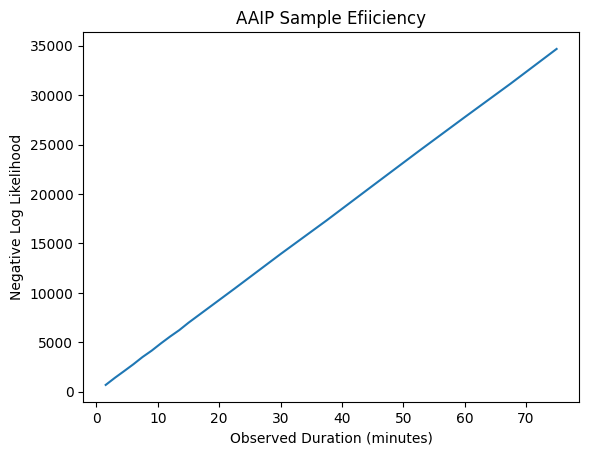

In [6]:
fig, ax = plt.subplots()

ax.plot(np.array(list(NLL_results.keys()))*(9/60), 
        NLL_results.values(),
        )
ax.set_xlabel("Observed Duration (minutes)")
ax.set_ylabel("Negative Log Likelihood")
ax.set_title("AAIP Sample Efiiciency")

plt.show()

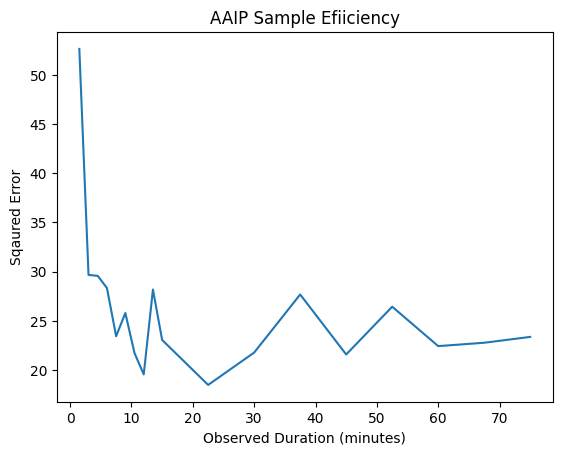

In [7]:
fig, ax = plt.subplots()

ax.plot(np.array(list(MSE_results.keys()))*(9/60), 
        [vals[0] for vals in MSE_results.values()],
        )
ax.set_xlabel("Observed Duration (minutes)")
ax.set_ylabel("Sqaured Error")
ax.set_title("AAIP Sample Efiiciency")

plt.show()

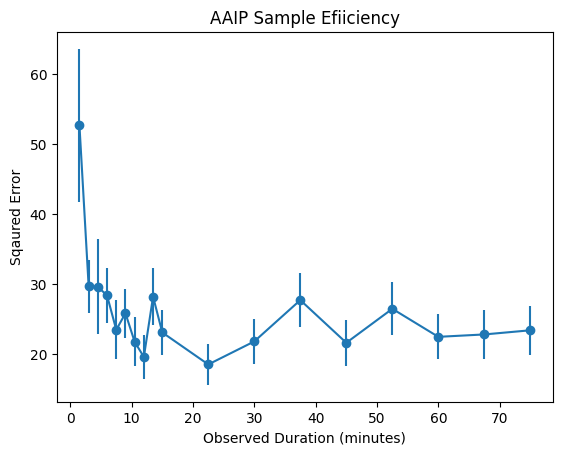

In [9]:
fig, ax = plt.subplots()

ax.errorbar(np.array(list(MSE_results.keys()))*(9/60), 
            [vals[0] for vals in MSE_results.values()], 
            [vals[1] for vals in MSE_results.values()], 
            fmt='-o')
ax.set_xlabel("Observed Duration (minutes)")
ax.set_ylabel("Sqaured Error")
ax.set_title("AAIP Sample Efiiciency")

plt.show()

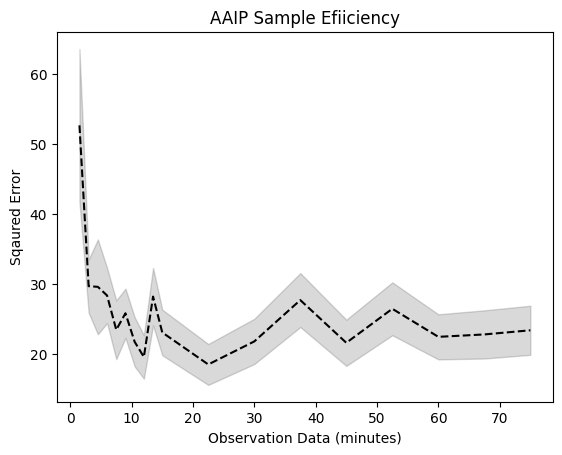

In [8]:
fig, ax = plt.subplots()

x = np.array(list(MSE_results.keys()))*(9/60)
y = [vals[0] for vals in MSE_results.values()]
err = [vals[1] for vals in MSE_results.values()]

ax.plot(x, y, 'k--')

ax.fill_between(x, [a-b for a,b in zip(y,err)], [a+b for a,b in zip(y,err)], color='black',  alpha=0.15)

# ax.errorbar(np.array(list(MSE_results.keys()))*(9/60), 
#             [vals[0] for vals in MSE_results.values()], 
#             [vals[1] for vals in MSE_results.values()], 
#             fmt='-o')
ax.set_xlabel("Observation Data (minutes)")
ax.set_ylabel("Sqaured Error")
ax.set_title("AAIP Sample Efiiciency")

plt.show()

In [ ]:
data_path = 'examples/CoDec_Research/results/analysis_results/Results_Set1V2_NeurIPS2025/Revision/ServerResults/sampleVariation/Test1/Set1V2_results_1samples.tsv'
MSE_results = {}
for sample_count in [1,3,5,8,10]:
    # print(f"Results for {sample_count} samples")
    data_path = re.sub(r'[0-9]+samples', f'{sample_count}samples', data_path)
    temp = pd.read_csv(data_path, sep='\t')
    MSE_results[sample_count*10] = sqrd_error(temp["lambda_true"], temp["lambda_predicted"])
    # sample_results[sample_count] = MSE(temp["lambda_true"], temp["lambda_predicted"])
    # for grp_indx, grp_data in temp.groupby("parameter"):
    #     print(grp_indx, " : ", MSE(grp_data["lambda_true"], grp_data["lambda_predicted"]))

In [ ]:
MSE_results

{10: (np.float64(49.63708354794485), np.float64(3.987846352005321)),
 30: (np.float64(31.297427976498014), np.float64(3.2000065099325057)),
 50: (np.float64(25.823783355551754), np.float64(2.3796510639878763)),
 80: (np.float64(22.93873378814721), np.float64(1.5072607934201658)),
 100: (np.float64(23.841099531244435), np.float64(2.1372050671737393))}

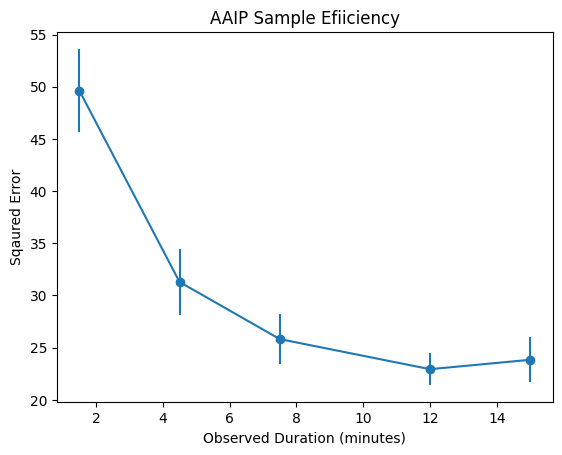

In [ ]:
fig, ax = plt.subplots()

ax.errorbar(np.array(list(MSE_results.keys()))*(9/60), 
            [vals[0] for vals in MSE_results.values()], 
            [vals[1] for vals in MSE_results.values()], 
            fmt='-o')
ax.set_xlabel("Observed Duration (minutes)")
ax.set_ylabel("Sqaured Error")
ax.set_title("AAIP Sample Efiiciency")

plt.show()